<a href="https://colab.research.google.com/github/Teelfee/GT-and-ML-exploration/blob/development/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
!ls

ex2data1.txt  ex2data2.txt  sample_data


In [0]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [0]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


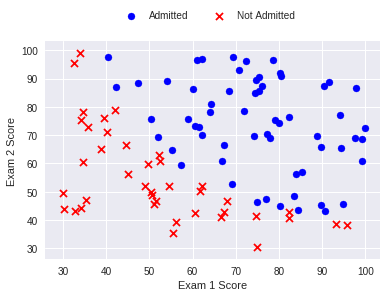

In [0]:
positive = data[data.admitted.isin(['1'])]  # 1
negetive = data[data.admitted.isin(['0'])]  # 0

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(positive['exam1'], positive['exam2'], c='b', label='Admitted')
ax.scatter(negetive['exam1'], negetive['exam2'], s=50, c='r', marker='x', label='Not Admitted')


# 设置图例显示在图的上方
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12),ncol=3)

# 设置横纵坐标名
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(- z))

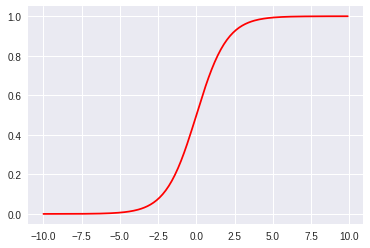

In [0]:
x1 = np.arange(-10, 10, 0.1)
plt.plot(x1, sigmoid(x1), c='r')
plt.show()

In [0]:
def cost(theta, X, y):
    first = (-y) * np.log(sigmoid(X @ theta))
    second = (1 - y)*np.log(1 - sigmoid(X @ theta))
    return np.mean(first - second)


In [0]:
# add a ones column - this makes the matrix multiplication work out easier
if 'Ones' not in data.columns:
    data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
X = data.iloc[:, :-1].as_matrix()  # Convert the frame to its Numpy-array representation.
y = data.iloc[:, -1].as_matrix()  # Return is NOT a Numpy-matrix, rather, a Numpy-array.

theta = np.zeros(X.shape[1])

# theta.reshape(3,1)


In [0]:


# y=y.reshape(100,1)

X.shape, theta.shape, y.shape, data.shape
# ((100, 3), (3,), (100,))

((100, 3), (3,), (100,), (100, 4))

In [0]:
cost(theta, X, y)

0.6931471805599453

In [0]:
def gradient(theta, X, y):
    return (X.T @ (sigmoid(X @ theta) - y))/len(X)  
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)

In [0]:
r=gradient(theta, X, y)
# array([ -0.1, -12.00921659, -11.26284221])

In [0]:
r.shape

(3,)

In [0]:
import scipy.optimize as opt

In [0]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='TNC', jac=gradient)
res
# help(opt.minimize) 
# res.x  # final_theta

     fun: 0.20349770158947394
     jac: array([9.04290379e-09, 9.02615302e-08, 4.84927098e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131878,   0.20623159,   0.20147149])

In [0]:
cost(res.x, X, y)

0.20349770158947394

In [0]:
def predict(theta, X):
    probability = sigmoid(X@theta)
    return [1 if x >= 0.5 else 0 for x in probability]  # return a list

In [0]:
final_theta =res.x
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(X)
accuracy


0.89

In [0]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86        39
          1       0.92      0.90      0.91        61

avg / total       0.89      0.89      0.89       100



In [0]:
x1 = np.arange(130, step=0.1)
x2 = -(final_theta[0] + x1*final_theta[1]) / final_theta[2]

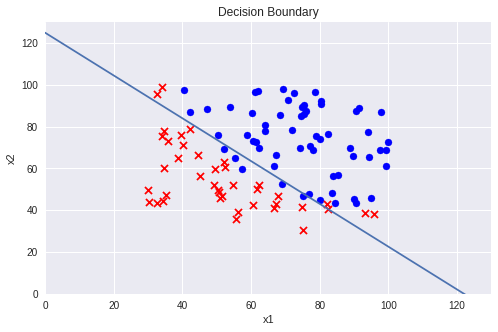

In [0]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['exam1'], positive['exam2'], c='b', label='Admitted')
ax.scatter(negetive['exam1'], negetive['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x1, x2)
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary')
plt.show()


In [0]:
data2 = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


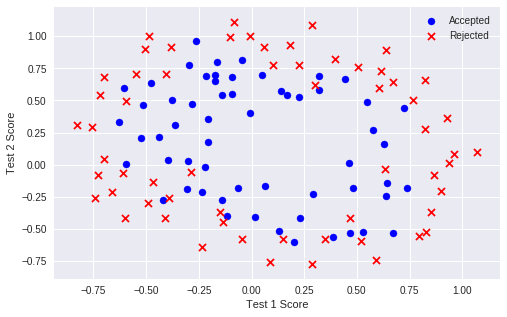

In [0]:
def plot_data():
    positive = data2[data2['Accepted'].isin([1])]
    negative = data2[data2['Accepted'].isin([0])]

    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
    ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
    ax.legend()
    ax.set_xlabel('Test 1 Score')
    ax.set_ylabel('Test 2 Score')
    
plot_data()	


In [0]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for p in np.arange(i + 1):
            data["f{}{}".format(i - p, p)] = np.power(x1, i - p) * np.power(x2, p)

#     data = {"f{}{}".format(i - p, p): np.power(x1, i - p) * np.power(x2, p)
#                 for i in np.arange(power + 1)
#                 for p in np.arange(i + 1)
#             }
    return pd.DataFrame(data)

In [0]:
x1 = data2['Test 1'].as_matrix()
x2 = data2['Test 2'].as_matrix()

In [0]:
_data2 = feature_mapping(x1, x2, power=6)
_data2.head()

,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [0]:
# 这里因为做特征映射的时候已经添加了偏置项，所以不用手动添加了。
X = _data2.as_matrix()  
y = data2['Accepted'].as_matrix()
theta = np.zeros(X.shape[1])
X.shape, y.shape, theta.shape  # ((118, 28), (118,), (28,))


((118, 28), (118,), (28,))

In [0]:
def costReg(theta, X, y, l=1):
    # 不惩罚第一项
    _theta = theta[1: ]
    reg = (l / (2 * len(X))) *(_theta @ _theta)  # _theta@_theta == inner product
    
    return cost(theta, X, y) + reg


In [0]:
costReg(theta, X, y, l=1)  #     0.6931471805599454

0.6931471805599454

In [0]:
def gradientReg(theta, X, y, l=1):
    reg = (1 / len(X)) * theta
    reg[0] = 0  
    return gradient(theta, X, y) + reg

In [0]:
gradientReg(theta, X, y, 1)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

In [0]:
result2 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, 2))
result2

(array([ 1.02253248,  1.13465456, -1.01863181, -0.08324364, -0.94198718,
        -0.37205336, -0.75992548,  0.56283944, -0.66539168, -0.30102279,
        -0.17881797, -0.21349659, -0.07321593, -1.78529748, -0.29358911,
        -0.53996494, -0.22918936, -0.28315229,  0.13957059, -0.06137378,
        -0.07697368, -0.0036225 , -1.27205982, -0.17736656, -0.26795949,
        -0.14054843,  0.00890082, -0.86417647]), 57, 1)

In [0]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
model.score(X, y)  

0.8305084745762712

In [0]:
final_theta = result2[0]
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
accuracy

0.8050847457627118

In [0]:
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.85      0.75      0.80        60
          1       0.77      0.86      0.81        58

avg / total       0.81      0.81      0.80       118



(-0.8, 1.2)

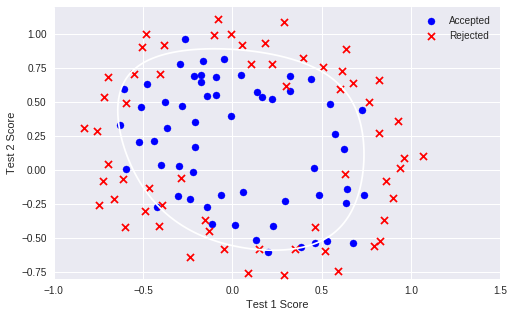

In [0]:
x = np.linspace(-1, 1.5, 250)
xx, yy = np.meshgrid(x, x)

z = feature_mapping(xx.ravel(), yy.ravel(), 6).as_matrix()
z = z @ final_theta
z = z.reshape(xx.shape)

plot_data()
plt.contour(xx, yy, z, 0)
plt.ylim(-.8, 1.2)
